##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [1]:
import pandas as pd
import json

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
df.head()

,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,model,os,os_version,pageS,time,CN,source,weekend,signup
0,chrome,45.0,2017-03-10,True,False,111.207.114.194,baidu,pc,windows,6.10,166.465,1489131657773,1.0,1,0,1
1,sogou,2.0,2017-03-13,False,False,1.202.80.36,NaN,pc,windows,6.10,1289.224,1489403913702,1.0,0,0,1
2,chrome,56.0,2017-03-13,True,False,210.12.8.240,baidu,pc,windows,6.10,1474.397,1489398682974,1.0,1,0,0
3,qq,9.5,2017-03-06,True,False,61.183.68.74,NaN,pc,windows,6.10,4.252,1488854597360,1.0,0,0,0
4,chrome,56.0,2017-03-11,True,False,101.80.177.64,baidu,mac,macosx,10.11,25.329,1489241919295,1.0,1,1,0


## Dataset Description

- browser
- browser version
- the day of this event
- is first day
- is first time
- ip address
- user source
- model (pc or mac or cellphone)
- operation system
- os version
- page stay time
- time 
- is ip address in China
- is the time in weekend
- did the user sign up 

Explore data

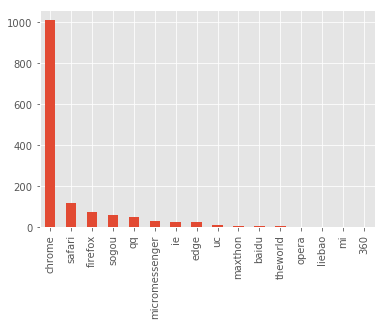

In [5]:
df['browser'].value_counts(dropna=False).plot.bar()

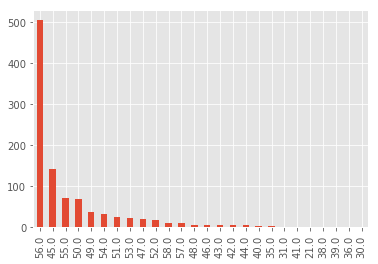

In [6]:
df.loc[df['browser'] == 'chrome']['browser_v'].value_counts(dropna=False).plot.bar()

In [7]:
browser_c = df['browser'].value_counts(dropna=False)

In [8]:
browser_c

chrome            1011
safari             121
firefox             77
sogou               60
qq                  52
micromessenger      30
ie                  27
edge                24
uc                  10
maxthon              6
baidu                5
theworld             5
opera                3
liebao               2
mi                   2
360                  1
Name: browser, dtype: int64

In [9]:
df['browser_bin'] = df['browser']

In [25]:
for i in range(len(df['browser'])):
    if browser_c[ df.browser.loc[i]] > 30:
        if df.browser.loc[i] == 'chrome' and df.browser_v.loc[i] != 56.0:
            df['browser_bin'].loc[i] = 'chrome_others'
        else:
            df['browser_bin'].loc[i] = df['browser'].loc[i]   
    else:
        df['browser_bin'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
df['browser_bin'].value_counts(dropna=False)

chrome_others    507
chrome           504
safari           121
others           115
firefox           77
sogou             60
qq                52
Name: browser_bin, dtype: int64

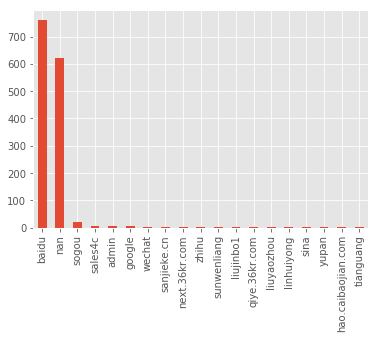

In [27]:
df['latest_utm_s'].value_counts(dropna=False).plot.bar()

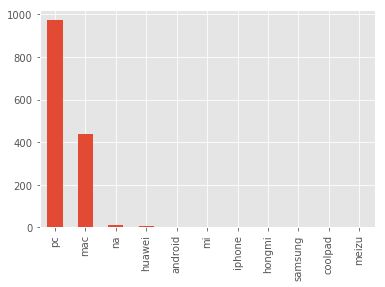

In [28]:
df['model'].value_counts(dropna=False).plot.bar()

In [29]:
model_c = df['model'].value_counts(dropna=False)

In [30]:
model_c

pc         972
mac        437
na          10
huawei       5
android      3
mi           2
iphone       2
hongmi       2
samsung      1
coolpad      1
meizu        1
Name: model, dtype: int64

In [31]:
df['model_bin'] = df['model']

In [34]:
for i in range(len(df['model'])):
    if model_c[ df.model.loc[i]] > 30:
        df['model_bin'].loc[i] = df['model'].loc[i]   
    else:
        df['model_bin'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
df['model_bin'].value_counts(dropna=False)

pc        972
mac       437
others     27
Name: model_bin, dtype: int64

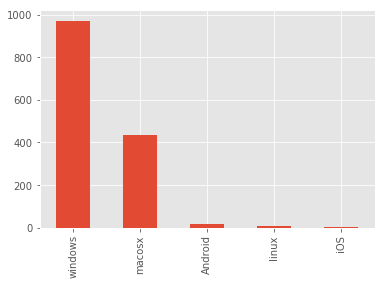

In [36]:
df['os'].value_counts(dropna=False).plot.bar()

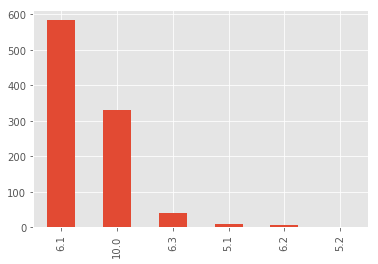

In [37]:
df.loc[df['os'] == 'windows']['os_version'].value_counts(dropna=False).plot.bar()

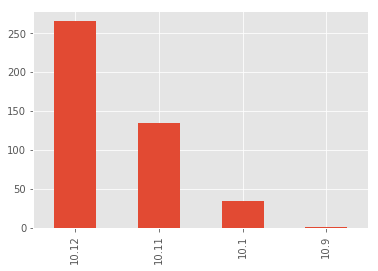

In [38]:
df.loc[df['os'] == 'macosx']['os_version'].value_counts(dropna=False).plot.bar()

In [39]:
os_c = df['os'].value_counts(dropna=False)

In [40]:
df['os_bin'] = df['os']

In [43]:
for i in range(len(df['os'])):
    if os_c[ df.os.loc[i]] > 30:
        if df.os.loc[i] == 'windows' and df.os_version.loc[i] != 6.1:
            df['os_bin'].loc[i] = 'windows_others'
        elif df.os.loc[i] == 'macosx' and df.os_version.loc[i] != 10.12:
            df['os_bin'].loc[i] = 'macosx_others'
        else:
            df['os_bin'].loc[i] = df['os'].loc[i]   
    else:
        df['os_bin'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
df['os_bin'].value_counts(dropna=False)

windows           583
windows_others    389
macosx            266
macosx_others     171
others             27
Name: os_bin, dtype: int64

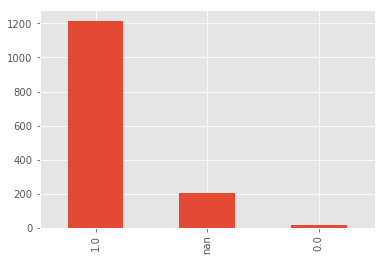

In [45]:
df['CN'].value_counts(dropna=False).plot.bar()

might need to merge nan to 1.0, since most people from China

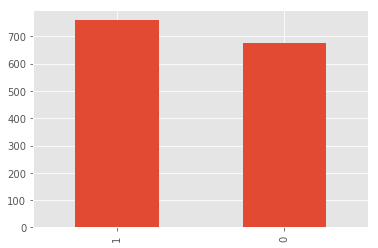

In [46]:
df['source'].value_counts(dropna=False).plot.bar()

might need to change source, create another value for nan: these people might already know sensordata, and go to the website directly.

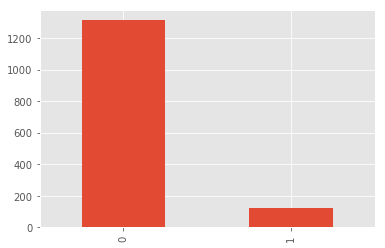

In [47]:
df['weekend'].value_counts(dropna=False).plot.bar()

Most people know or check this website for work. The number of interactions on weekends is small.

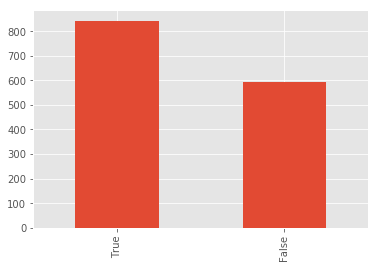

In [48]:
df['is_fd'].value_counts(dropna=False).plot.bar()

Some people come the other day

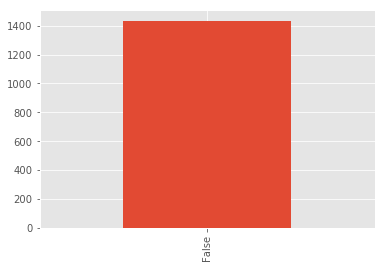

In [49]:
df['is_ft'].value_counts(dropna=False).plot.bar()

## Clean data - dealing with missing values

In [50]:
# Count missing values by column
df.isnull().sum()

browser           0
browser_v         0
day               0
is_fd             0
is_ft             0
ip                0
latest_utm_s    621
model             0
os                0
os_version        0
pageS             0
time              0
CN              204
source            0
weekend           0
signup            0
browser_bin       0
model_bin         0
os_bin            0
dtype: int64

In [51]:
df['source'] = (df.latest_utm_s == 'baidu') * 2 + (df.latest_utm_s.isnull()) * 1 

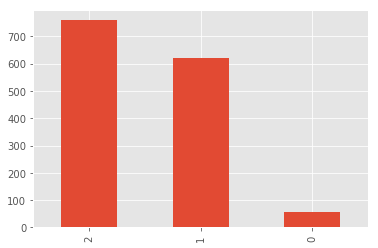

In [52]:
df['source'].value_counts(dropna=False).plot.bar()

In [54]:
df[['latest_utm_s','source']].head()

,latest_utm_s,source
0,baidu,2
1,NaN,1
2,baidu,2
3,NaN,1
4,baidu,2


In [55]:
# Make a copy of df, because you don't want to mess up with orignal df when you experiment stuff
df_fillna = df.copy()

In [56]:
# drop column with only one variable
df_fillna.drop(['is_ft'],axis=1)

,browser,browser_v,day,is_fd,ip,latest_utm_s,model,os,os_version,pageS,time,CN,source,weekend,signup,browser_bin,model_bin,os_bin
0,chrome,45.00000,2017-03-10,True,111.207.114.194,baidu,pc,windows,6.10,166.465,1489131657773,1.0,2,0,1,chrome_others,pc,windows
1,sogou,2.00000,2017-03-13,False,1.202.80.36,NaN,pc,windows,6.10,1289.224,1489403913702,1.0,1,0,1,sogou,pc,windows
2,chrome,56.00000,2017-03-13,True,210.12.8.240,baidu,pc,windows,6.10,1474.397,1489398682974,1.0,2,0,0,chrome,pc,windows
3,qq,9.50000,2017-03-06,True,61.183.68.74,NaN,pc,windows,6.10,4.252,1488854597360,1.0,1,0,0,qq,pc,windows
4,chrome,56.00000,2017-03-11,True,101.80.177.64,baidu,mac,macosx,10.11,25.329,1489241919295,1.0,2,1,0,chrome,mac,macosx_others
5,chrome,56.00000,2017-03-09,True,114.249.167.81,baidu,mac,macosx,10.12,25.133,1489066436365,1.0,2,0,0,chrome,mac,macosx
6,sogou,2.00000,2017-03-07,True,119.123.126.233,baidu,pc,windows,6.10,2076.163,1488881113235,NaN,2,0,1,sogou,pc,windows
7,chrome,56.00000,2017-03-11,False,182.48.107.156,baidu,mac,macosx,10.12,73659.349,1489214616479,1.0,2,1,0,chrome,mac,macosx
8,safari,10.00000,2017-03-08,True,182.18.2.100,NaN,mac,macosx,10.12,8.556,1488959994351,NaN,1,0,0,safari,mac,macosx
9,chrome,56.00000,2017-03-08,False,116.226.99.241,admin,mac,macosx,10.12,150.305,1488967729544,1.0,0,0,0,chrome,mac,macosx


In [59]:
# Fill missing value for CN
df_fillna['CN'] = df['CN'].fillna('2')

In [60]:
# Fill missing value for latest_utm_s, make the nan source from sensordata itself
df_fillna['latest_utm_s'] = df['latest_utm_s'].fillna('sensordata')

In [61]:
import geoip2.database
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-City_20180206/GeoLite2-City.mmdb')

In [62]:
CT=[]
for i in range(len(df_fillna['ip'])):
    try:
        CT.append (reader.city(df.loc[i,'ip']).city.name) 
    except:
        CT.append('')

In [63]:
#example usage
reader.city('219.135.131.99').subdivisions.most_specific.iso_code

'GD'

In [64]:
df_fillna['CT'] = CT

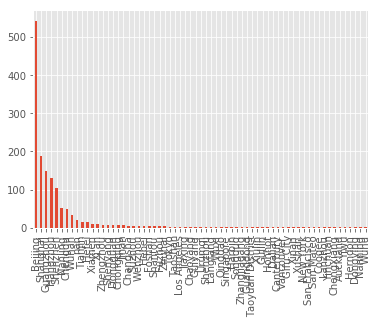

In [65]:
df_fillna['CT'].value_counts(dropna=False).plot.bar()

In [73]:
CT_c = df_fillna['CT'].value_counts(dropna=False)

In [74]:
CT_c

Beijing             543
Shanghai            189
Guangzhou           149
Hangzhou            129
Shenzhen            103
Nanjing              51
Chengdu              50
Wuhan                32
others               20
Tianjin              15
Hefei                14
Xiamen                9
Xi'an                 9
Zhengzhou             8
Dongguan              7
Shenyang              7
Chongqing             7
Jinan                 6
Wenzhou               5
Changsha              5
Suzhou                5
Hebei                 5
Foshan                4
Zhuhai                4
Fuzhou                4
Shantou               4
Tokyo                 3
Los Angeles           2
Ürümqi                2
Chaoyang              2
                   ... 
Langfang              2
Guiyang               2
Shenzhou              2
Hohhot                1
Xiulin                1
Xushan                1
Canterbury            1
Guangdong             1
Guilin                1
Xinan                 1
Chengxiang      

In [75]:
df_fillna['CT_bin'] = df_fillna['CT']

In [76]:
for i in range(len(df_fillna['CT'])):
    if CT_c[ df_fillna['CT'].loc[i]] > 30:
        df_fillna['CT_bin'].loc[i] = df_fillna['CT'].loc[i]   
    else:
        df_fillna['CT_bin'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
df_fillna['CT_bin'].value_counts(dropna=False)

Beijing      543
others       190
Shanghai     189
Guangzhou    149
Hangzhou     129
Shenzhen     103
Nanjing       51
Chengdu       50
Wuhan         32
Name: CT_bin, dtype: int64

In [83]:
# too many cities, use province to do analysis
PRO=[]
for i in range(len(df_fillna['ip'])):
    try:
        PRO.append (reader.city(df.loc[i,'ip']).subdivisions.most_specific.iso_code) 
    except:
        PRO.append('')

In [84]:
df_fillna['PRO'] = PRO

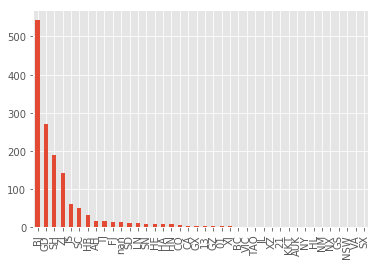

In [85]:
df_fillna['PRO'].value_counts(dropna=False).plot.bar()

In [86]:
PRO_c = df_fillna['PRO'].value_counts(dropna=False)

In [87]:
PRO_c

BJ     543
GD     271
SH     189
ZJ     141
JS      60
SC      50
HB      33
AH      15
TJ      15
FJ      13
NaN     13
SD      10
LN      10
SN       9
HE       9
HA       8
HN       8
CQ       7
CA       4
GX       3
13       3
GZ       2
01       2
XJ       2
BC       1
VIC      1
TAO      1
JL       1
XZ       1
21       1
KKT      1
AUK      1
NY       1
HL       1
NM       1
NX       1
GS       1
NSW      1
VA       1
SX       1
Name: PRO, dtype: int64

In [88]:
df_fillna['PRO_bin'] = df_fillna['PRO']

In [91]:
for i in range(len(df_fillna['PRO'])):
    if PRO_c[ df_fillna['PRO'].loc[i]] > 30:
        df_fillna['PRO_bin'].loc[i] = df_fillna['PRO'].loc[i]   
    else:
        df_fillna['PRO_bin'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [92]:
df_fillna['PRO_bin'].value_counts(dropna=False)

BJ        543
GD        271
SH        189
others    149
ZJ        141
JS         60
SC         50
HB         33
Name: PRO_bin, dtype: int64

In [93]:
df_fillna.describe()

,browser_v,os_version,pageS,time,source,weekend,signup
count,1436.000000,1436.000000,1.436000e+03,1.436000e+03,1436.000000,1436.000000,1436.000000
mean,41.624191,8.167180,1.984706e+04,1.489163e+12,1.489554,0.086351,0.284819
std,19.656667,2.127232,1.066756e+05,2.279683e+08,0.572812,0.280979,0.451485
min,-1.000000,-1.000000,1.420000e-01,1.488791e+12,0.000000,0.000000,0.000000
25%,40.000000,6.100000,2.351475e+01,1.488964e+12,1.000000,0.000000,0.000000
50%,51.000000,10.000000,2.590280e+02,1.489126e+12,2.000000,0.000000,0.000000
75%,56.000000,10.110000,4.340998e+03,1.489396e+12,2.000000,0.000000,1.000000
max,58.000000,10.900000,2.918014e+06,1.489513e+12,2.000000,1.000000,1.000000


In [94]:
# use this fillna feature
df = df_fillna

### Explore sign up rate split by features 

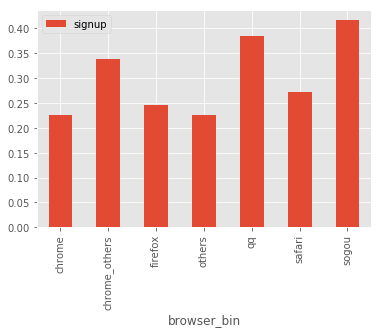

In [100]:
df[['browser_bin', 'signup']].groupby(['browser_bin']).mean().plot.bar()

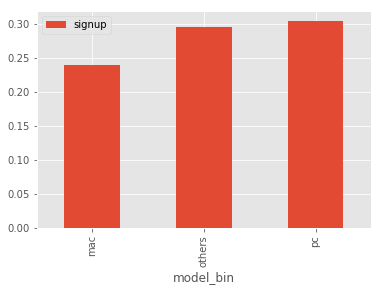

In [101]:
df[['model_bin', 'signup']].groupby(['model_bin']).mean().plot.bar()

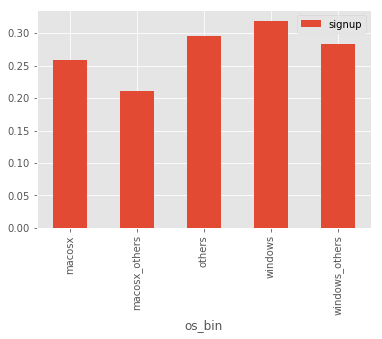

In [102]:
df[['os_bin', 'signup']].groupby(['os_bin']).mean().plot.bar()

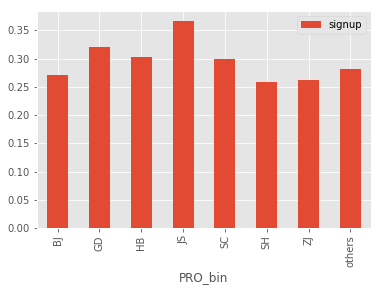

In [96]:
df[['PRO_bin', 'signup']].groupby(['PRO_bin']).mean().plot.bar()

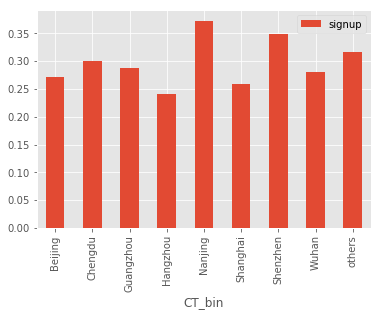

In [98]:
df[['CT_bin', 'signup']].groupby(['CT_bin']).mean().plot.bar()

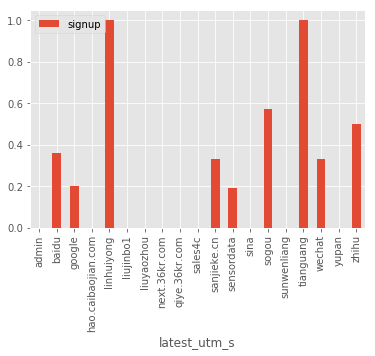

In [103]:
df[['latest_utm_s', 'signup']].groupby(['latest_utm_s']).mean().plot.bar()

In [104]:
df['latest_utm_s'].value_counts(dropna=False)

baidu                 759
sensordata            621
sogou                  21
sales4c                 6
google                  5
admin                   5
wechat                  3
sanjieke.cn             3
zhihu                   2
next.36kr.com           2
sunwenliang             1
liujinbo1               1
qiye.36kr.com           1
liuyaozhou              1
linhuiyong              1
sina                    1
yupan                   1
hao.caibaojian.com      1
tianguang               1
Name: latest_utm_s, dtype: int64

For all the sources has data larger than 5:
sogou has the highest signup rate
Keep sogou in binning

In [124]:
source_c = df['latest_utm_s'].value_counts(dropna=False)

In [125]:
source_c

baidu                 759
sensordata            621
sogou                  21
sales4c                 6
google                  5
admin                   5
wechat                  3
sanjieke.cn             3
zhihu                   2
next.36kr.com           2
sunwenliang             1
liujinbo1               1
qiye.36kr.com           1
liuyaozhou              1
linhuiyong              1
sina                    1
yupan                   1
hao.caibaojian.com      1
tianguang               1
Name: latest_utm_s, dtype: int64

In [111]:
for i in range(len(df['latest_utm_s'])):
    if source_c[ df['latest_utm_s'].loc[i]] > 20:
        df['source'].loc[i] = df['latest_utm_s'].loc[i]   
    else:
        df['source'].loc[i] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [112]:
df['source'].value_counts(dropna=False)

baidu         759
sensordata    621
others         35
sogou          21
Name: source, dtype: int64

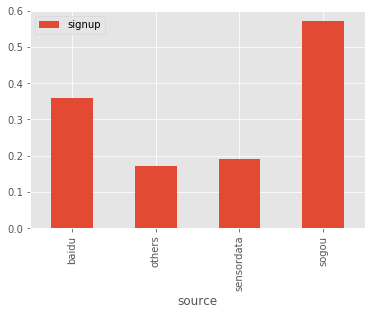

In [113]:
df[['source', 'signup']].groupby(['source']).mean().plot.bar()

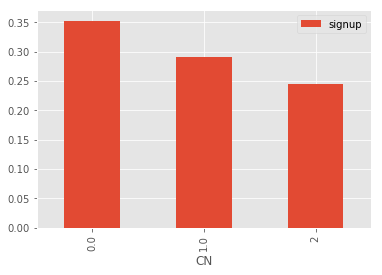

In [105]:
df[['CN', 'signup']].groupby(['CN']).mean().plot.bar()

People not in China has higher sign up rate

over 1200 users in China, try to create a column for different user interaction of the day

In [114]:
import datetime

In [121]:
def to_hour(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime('%H')
# first convert from milliseconds to seconds, and then convert format from time stamp

In [136]:
#df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
df['hour'] = df['time'].apply(lambda row: (int(to_hour(row))))

In [137]:
df['hour'].head()

0     1
1     6
2     4
3    20
4     8
Name: hour, dtype: int64

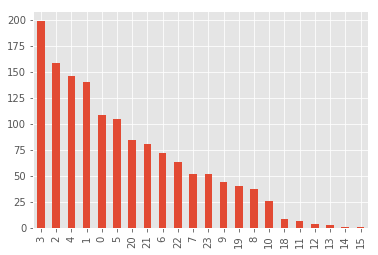

In [138]:
df['hour'].value_counts(dropna=False).plot.bar()

Convert UTC time to Beijing Time, work time (8-17) is (0-9)

In [139]:
df['worktime'] = ((df.hour >= 0) & (df.hour <= 9)) * 1

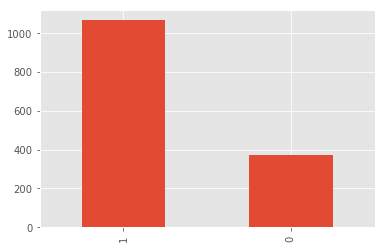

In [140]:
df['worktime'].value_counts(dropna=False).plot.bar()

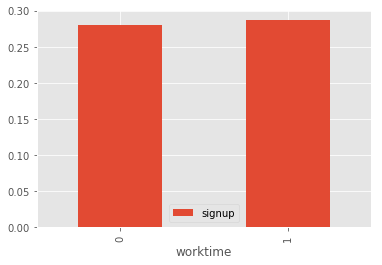

In [141]:
df[['worktime', 'signup']].groupby(['worktime']).mean().plot.bar()

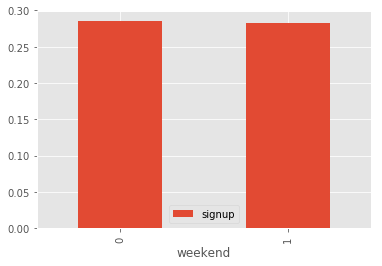

In [106]:
df[['weekend', 'signup']].groupby(['weekend']).mean().plot.bar()

People has same signup rate over the weekends

In [142]:
df.columns

Index(['browser', 'browser_v', 'day', 'is_fd', 'is_ft', 'ip', 'latest_utm_s',
       'model', 'os', 'os_version', 'pageS', 'time', 'CN', 'source', 'weekend',
       'signup', 'browser_bin', 'model_bin', 'os_bin', 'CT', 'PRO', 'CT_bin',
       'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [143]:
selected_data_csv = 'data/selected_data.csv'
df.to_csv(selected_data_csv, index=False)